In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


The above command is used to import all the necessary libraries for the dataset.

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


The above command displays the first few rows of the dataset.

In [7]:


for column in df.select_dtypes(include=['object']).columns:

    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:

        print(f"Column '{column}' could not be converted to numeric and might need to be handled separately.")

        df = df.drop(columns=[column])


Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
outliers_iqr_sum = outliers_iqr.sum()
outliers_iqr_sum

Column 'destination' could not be converted to numeric and might need to be handled separately.
Column 'passanger' could not be converted to numeric and might need to be handled separately.
Column 'weather' could not be converted to numeric and might need to be handled separately.
Column 'time' could not be converted to numeric and might need to be handled separately.
Column 'coupon' could not be converted to numeric and might need to be handled separately.
Column 'expiration' could not be converted to numeric and might need to be handled separately.
Column 'gender' could not be converted to numeric and might need to be handled separately.
Column 'age' could not be converted to numeric and might need to be handled separately.
Column 'maritalStatus' could not be converted to numeric and might need to be handled separately.
Column 'education' could not be converted to numeric and might need to be handled separately.
Column 'occupation' could not be converted to numeric and might need to 

,0
temperature,0
has_children,0
toCoupon_GEQ5min,0
toCoupon_GEQ15min,0
toCoupon_GEQ25min,1511
direction_same,2724
direction_opp,2724
Y,0


The Interquartile Range (IQR) method is used to identify outliers by determining the range between the 25th (Q1) and 75th (Q3) percentiles.
For this :
First  the data needs to be divided into Quartiles:

Q1 (25th percentile): This is the median of the lower half of the dataset. It represents the value below which 25% of the data fall.

Q3 (75th percentile): This is the median of the upper half of the dataset. It represents the value below which 75% of the data fall.


Secondly we have to :Calculate the Interquartile Range (IQR): The IQR is the range between the 25th and 75th percentiles:

IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1

For the third step we need to Determine the Boundaries for Outliers: To find potential outliers, calculate the "fences," or boundaries beyond which data points are considered outliers. These fences are calculated using the IQR and a multiplier (commonly 1.5):

Lower Bound:

Lower Bound
=
𝑄
1
−
1.5
×
IQR
Lower Bound=Q1−1.5×IQR
Upper Bound:

Upper Bound
=
𝑄
3
+
1.5
×
IQR
Upper Bound=Q3+1.5×IQR

Any data point that is below the lower bound or above the upper bound is considered an outlier.

In [8]:
# Identify outliers in numerical features using  Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3)
outliers_z_sum = outliers_z.sum()
outliers_z_sum

,0
temperature,0
has_children,0
toCoupon_GEQ5min,0
toCoupon_GEQ15min,0
toCoupon_GEQ25min,0
direction_same,0
direction_opp,0
Y,0


The Z-score (also called a standard score) indicates how many standard deviations a particular data point is from the mean of the dataset. It tells you whether a value is above or below the average, and by how much, in terms of standard deviations.
The formula to calculate the Z-score for a data point
𝑥
x is:

𝑍
=
𝑥
−
𝜇/
𝜎
x = the data point

𝜇
μ = the mean of the dataset


𝜎
σ = the standard deviation of the dataset
(calculated using formula)



In [9]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

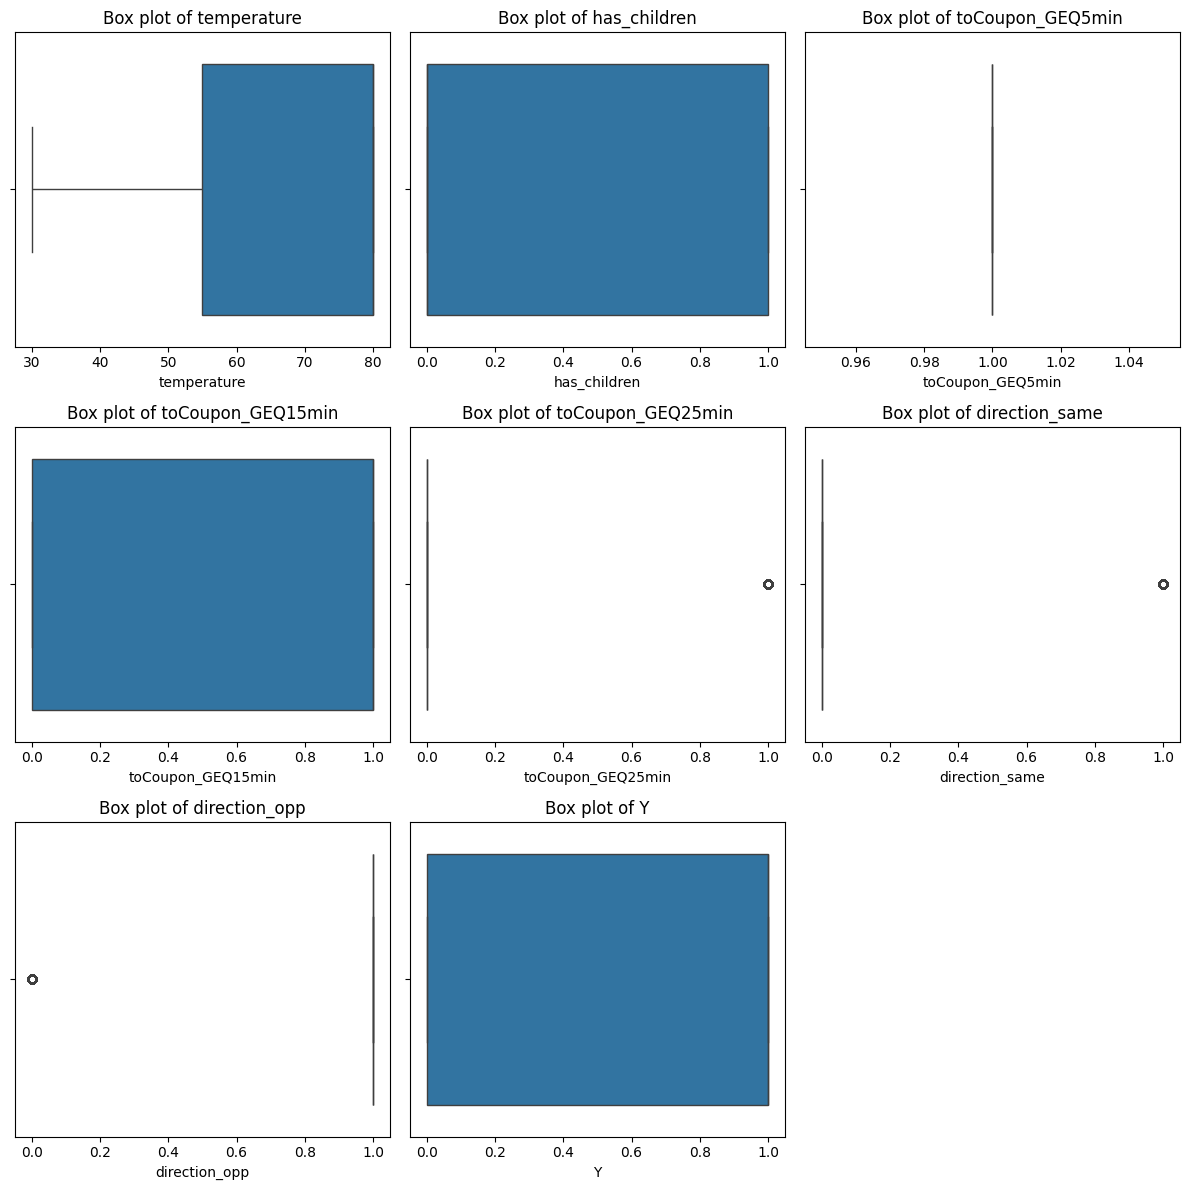

In [12]:



numerical_cols = df.select_dtypes(include=['number']).columns


num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(12, num_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

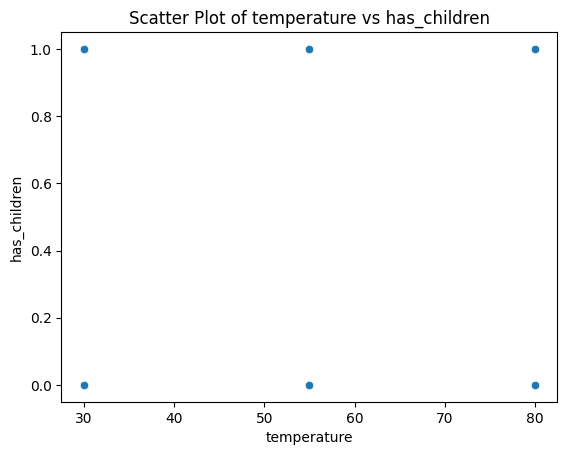

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt




x_column = 'temperature'
y_column = 'has_children'

sns.scatterplot(x=df[x_column], y=df[y_column])
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.show()

In [15]:
df_cleaned_iqr = df[~outliers_iqr.any(axis=1)]

The above command is used to remove outliers based on the IQR system.

In [16]:
df_capped_iqr = df.copy()
df_capped_iqr = df_capped_iqr.apply(lambda x: np.clip(x, Q1[x.name] - 1.5 * IQR[x.name], Q3[x.name] + 1.5 * IQR[x.name]))

The above command is used to cap the outliers without removing them by setting a maximum and a minimum value.

In [17]:
df_transformed = df.copy()
df_transformed = df_transformed.apply(lambda x: np.log1p(x) if x.min() > 0 else x)

The above command is used to apply log transformation to the outliers.

The decision for of capping, removing and transformation is taken as:
Are the outliers due to data errors or anomalies?

Yes → Remove them.

No → Move to the next question.

Do the outliers represent valid extreme cases that are not errors but may distort analysis?

Yes → Consider capping or transforming them.

No → Proceed to the next question.

Does removing outliers result in the loss of too much information?

Yes → Consider capping or transforming.

No → Remove outliers.

Is the data distribution skewed or log-normal?

Yes → Transform the data (e.g., log transformation).

No → Consider capping.

Do you want to preserve all data points but reduce the effect of outliers?

Yes → Cap the outliers.

No → Remove or transform.

In [18]:
df.describe(), df_cleaned_iqr.describe(), df_capped_iqr.describe(), df_transformed.describe()

(        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
 count  12684.000000  12684.000000           12684.0       12684.000000   
 mean      63.301798      0.414144               1.0           0.561495   
 std       19.154486      0.492593               0.0           0.496224   
 min       30.000000      0.000000               1.0           0.000000   
 25%       55.000000      0.000000               1.0           0.000000   
 50%       80.000000      0.000000               1.0           1.000000   
 75%       80.000000      1.000000               1.0           1.000000   
 max       80.000000      1.000000               1.0           1.000000   
 
        toCoupon_GEQ25min  direction_same  direction_opp             Y  
 count       12684.000000    12684.000000   12684.000000  12684.000000  
 mean            0.119126        0.214759       0.785241      0.568433  
 std             0.323950        0.410671       0.410671      0.495314  
 min             0.000000      

This command is used to finally compare the statistics of the original dataset and the handled dataset.